#**Capstone Project G10 - NLP1 Mar 21A**

#**Automatic Ticket Assignment**

**Team**

Lakshmi R Pillai

Rajesh D

Sarrah Sadikot

Sankarananda R

Tejas Ramachandharan

---

## <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">The Real Problem/Context

<font color=darkblue> 
One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the 
Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the 
interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times 
which result in user satisfaction deterioration / poor customer service.
</font> 

## <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Business Domain Value

<font color=darkblue> 
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.
    
Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring  Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.  
</font> 
<font color=darkblue>         
L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.
    
During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are  wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right  functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.
</font> 
    
<font color=darkblue>    
Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks

</font> 

## <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Project Description

<font color=darkblue> 

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.Details about the data and dataset files are given in below link,
    
https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ
    
    
Pre-Processing, Data Visualization and EDA
    
● Exploring the given Data files
    
● Understanding the structure of data
    
● Missing points in data
    
● Finding inconsistencies in the data
    
● Visualizing different patterns 
    
● Visualizing different text features
    
● Dealing with missing values
    
● Text preprocessing 
    
● Creating word vocabulary from the corpus of report text data
    
● Creating tokens as required 
    
Model Building
    
 Building a model architecture which can classify.
    
 Trying different model architectures by researching state of the art for similar tasks.
    
 Train the model
    
 To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.
    
Test the Model, Fine-tuning and Repeat
    
● Test the model and report as per evaluation metrics
    
● Try different models
    
● Try different evaluation metrics 
    
● Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
    
● Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric
    
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">Project Objectives

<font color=darkblue> 
    
The objective of the project is,
    
 Learn how to use different classification models.
    
 Use transfer learning to use pre-built models.
    
 Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.
    
 Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

</font> 

---

###**Importing Necessary Packages**

In [ ]:
import re
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.utils import resample
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet,stopwords
from nltk.stem.porter import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


##**Pre-Processing, Data Visualization and EDA**

###**1. Exploring the given Data files**

Importing the provided dataset

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone project/input_data.xlsx')
dataset.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

**Exploring a few random samples**

In [ ]:
dataset.sample(10)

Short description  \
5993  laptop will not turn on, either docked or un-d...   
6293  adobe reader on my pc suddenly will not work, ...   
7750  md04, display stock, is locking up with create...   
621                            uacyltoe hxgaycze ignore   
5760  log in permissions not working.  need to chang...   
3465  apac, apac: temprature sensor#1, yellow - on  ...   
7011                          laptop screen flickering    
4271                                     printer setrup   
6696             collaboration_platform site  ownership   
7167     i do not have access to ethics training module   

                                            Description             Caller  \
5993  laptop will not turn on, either docked or un-d...  eqcudbks zbjeqruy   
6293  adobe reader on my pc suddenly will not work, ...  pzrskcon pobsajnx   
7750  the window is locked up, can't do screenshots,...  wkeiqpud dzgemhbk   
621                                   uacyltoe hxgaycze  jloygrwh acvztedi   
5760  name:etlfrucw ziewxqof\nlanguage:\nbrowser:mic...  etlfrucw ziewxqof   
3465  sw#1, temperature sensor#1, yellow - on   comp...  mnlazfsr mtqrkhnx   
7011  hello team,_x000D_\n_x000D_\nmy laptop monitor...  nvxkdqfi slkojtcg   
4271                                 id01 printer setup  aqourvgz mkehgcdu   
6696  _x000D_\n_x000D_\nreceived from: unrbafjx.reys...  unrbafjx reyshakw   
7167  error message: welcome to the company business...  fhbvisgc cbxpgkwl   

     Assignment group  
5993            GRP_3  
6293            GRP_3  
7750            GRP_0  
621            GRP_36  
5760            GRP_0  
3465            GRP_4  
7011           GRP_19  
4271           GRP_19  
6696           GRP_16  
7167           GRP_23

In [ ]:
dataset.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

**Checking the shape of the data**

In [ ]:
shape = dataset.shape
print(f"{shape}  |  The dataset has {shape[0]} rows and {shape[1]} columns")

(8500, 4)  |  The dataset has 8500 rows and 4 columns


###**2. Understanding the structure of data**

**Checking the columns**

In [ ]:
dataset.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

**Checking datatypes of each column**

In [ ]:
dataset.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

**Checking the number of categories**

In [ ]:
len(dataset["Assignment group"].unique())

74

There are 74 unique categories in `"Assignment group"`

In [ ]:
pd.DataFrame( dataset["Assignment group"].value_counts() )

Assignment group
GRP_0               3976
GRP_8                661
GRP_24               289
GRP_12               257
GRP_9                252
...                  ...
GRP_64                 1
GRP_67                 1
GRP_35                 1
GRP_70                 1
GRP_73                 1

[74 rows x 1 columns]

**Checking number of unique values in each column**

In [ ]:
dataset.nunique()

Short description    7481
Description          7817
Caller               2950
Assignment group       74
dtype: int64

There seems to be duplicates in the dataset ( number of unique values is lower than the total number of rows ) so we should consider dropping them 

**Checking extra information about the dataset**

In [ ]:
dataset.describe(include='all')

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


There seems to be a few null values in `"Short description"` and `"Description"`

### **3. Missing points in data**

**Checking for `"NaN"` values**

In [ ]:
dataset.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Cheking for `"null"` values**

In [ ]:
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

There are 8 null/NaN values in `"Short description"` and 1 null/NaN value in `"Desciption"`

**Cheking the null / NaN datapoints**

In [ ]:
dataset[dataset.isna().any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

8 of the null/NaN values are from `GRP_0` and 1 is from `GRP_34` so before dropping / replacing let us check the value count of `GRP_0` and `GRP_34`

In [ ]:
counts = dataset["Assignment group"].value_counts()

print(f"Count of GRP_0  : {counts.GRP_0}")
print(f"Count of GRP_34 : {counts.GRP_34}")

Count of GRP_0  : 3976
Count of GRP_34 : 62


since only one of the fields is missing for each of the cases let us replace `NaN` with `" "` ( empty string ). We will do this while dealing with missing values

###**4. Finding inconsistencies in the data**

**Cheking the distribution across `"Assignment group"`**

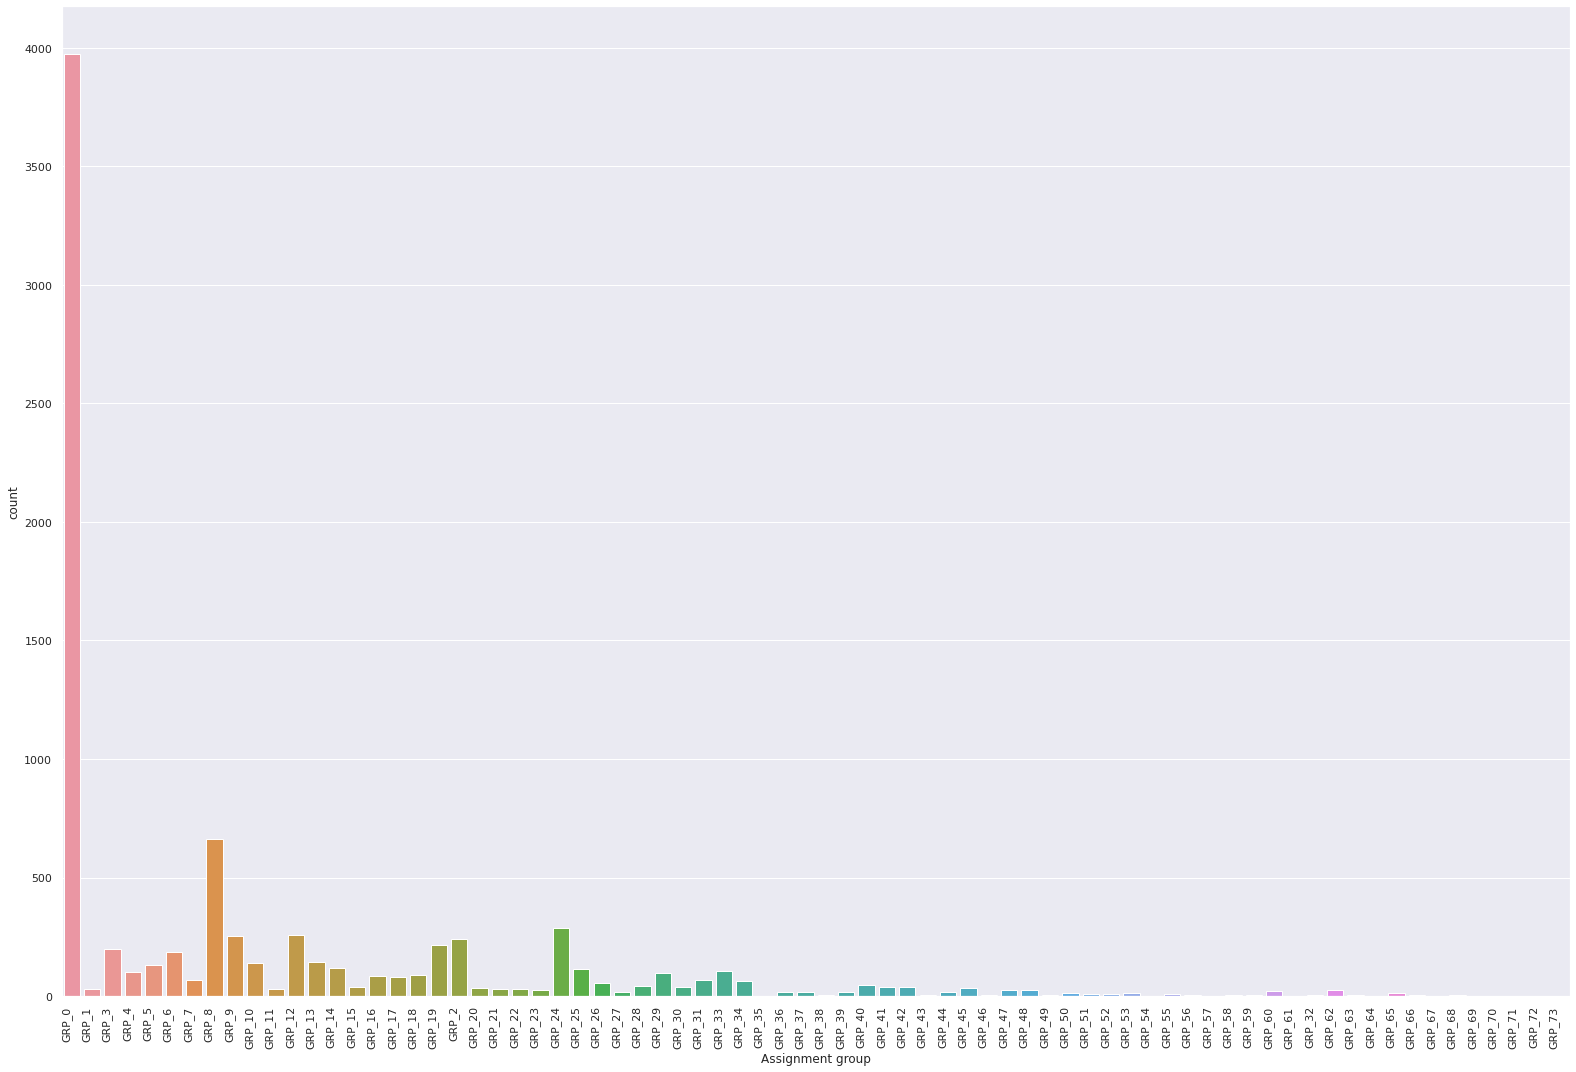

In [ ]:
plt.figure(figsize=(22,15))
ax=sns.countplot(x='Assignment group',data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

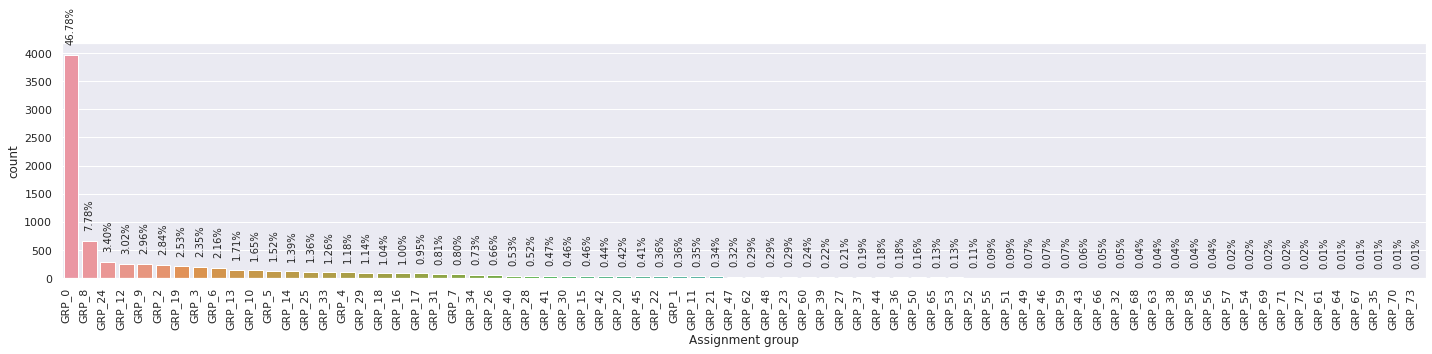

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=dataset, order=dataset["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,ha="right")
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(dataset.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.show()

From the above graph we can infer that the dataset is highly unbalanced with 3976 datapoints in GRP_0

**Most frequent 20 groups**

In [ ]:
dataset['Assignment group'].value_counts().nlargest(20)

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
Name: Assignment group, dtype: int64

**Least frequent 20 groups**

In [ ]:
dataset['Assignment group'].value_counts().nsmallest(20)

GRP_61    1
GRP_64    1
GRP_67    1
GRP_35    1
GRP_70    1
GRP_73    1
GRP_57    2
GRP_54    2
GRP_69    2
GRP_71    2
GRP_72    2
GRP_68    3
GRP_63    3
GRP_38    3
GRP_58    3
GRP_56    3
GRP_66    4
GRP_32    4
GRP_43    5
GRP_49    6
Name: Assignment group, dtype: int64

**Checking for duplicates**

In [ ]:
sum(dataset.duplicated())

83

**Checking the `Caller` column**

In [ ]:
dataset["Caller"].sample(10)

6859    jloygrwh acvztedi
6746    nhixruet elnjqdwg
7883    iauqlrjk nijdaukz
1133    dkxlpvnr narxcgjh
942     qkmgtnla buraxcij
2551    hgcrtxez azoeingw
5324    bpctwhsn kzqsbmtp
3713    tuqrvowp fxmzkvqo
5199    ockwafib wftboqry
466     jcgzqndm hukibzqa
Name: Caller, dtype: object

The `"Caller"` column does not seem to provide any useful information for classification so will drop it

#### **Dealing with the inconsistencies**

Let us work on a copy of the dataset in case we need the original later

In [ ]:
dataset_a = dataset.copy()

**Dropping `"Caller"` Column**

In [ ]:
dataset_a.drop("Caller",axis=1,inplace = True)

dataset_a.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  
0  -verified user details.(employee# & manager na...            GRP_0  
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...            GRP_0  
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...            GRP_0  
3                      unable to access hr_tool page            GRP_0  
4                                       skype error             GRP_0

**Dropping duplicates**

In [ ]:
print("Number of duplicates :",sum(dataset_a.duplicated()))

Number of duplicates : 591


After dropping `"Caller"`, The duplicate count increased from 83 to 591. We will now drop the duplicates

In [ ]:
dataset_a.drop_duplicates(inplace = True)

print("Number of duplicates :",sum(dataset_a.duplicated()))

Number of duplicates : 0


**Merging lower frequency categories**

This is to semi-fix the unbalanced nature of the dataset

In [ ]:
counts = dataset_a["Assignment group"].value_counts()

threshold_counts = [0,0,0,0,0]

for x in counts.values :
  if x <50 :
    threshold_counts[0] += 1
  if x <100: 
    threshold_counts[1] += 1
  if x <150:
    threshold_counts[2] += 1
  if x <200:
    threshold_counts[3] += 1
  if x <250:
    threshold_counts[4] += 1





print(f"Less than 50  : {threshold_counts[0]}")
print(f"Less than 100 : {threshold_counts[1]}")
print(f"Less than 150 : {threshold_counts[2]}")
print(f"Less than 200 : {threshold_counts[3]}")
print(f"Less than 250 : {threshold_counts[4]}")


Less than 50  : 50
Less than 100 : 59
Less than 150 : 65
Less than 200 : 66
Less than 250 : 69


In [ ]:
init_data = [
             {'Description':'1 ticket','Ticket Count':0},
             {'Description':'2-5 ticket','Ticket Count':0},
             {'Description':'6-10 ticket','Ticket Count':0},
             {'Description':'11-20 ticket','Ticket Count':0},
             {'Description':'21-50 ticket','Ticket Count':0},
             {'Description':'51-100 ticket','Ticket Count':0},
             {'Description':'>100 ticket','Ticket Count':0},
  ]
df_bins = pd.DataFrame(init_data)

for x in counts.values :
  if x <=1 :
    df_bins["Ticket Count"][0] += 1
  elif x <= 5: 
    df_bins["Ticket Count"][1] += 1
  elif x <= 10: 
    df_bins["Ticket Count"][2] += 1
  elif x <= 20: 
    df_bins["Ticket Count"][3] += 1
  elif x <= 50: 
    df_bins["Ticket Count"][4] += 1
  elif x <= 100: 
    df_bins["Ticket Count"][5] += 1
  else : 
    df_bins["Ticket Count"][6] += 1


df_bins

Description  Ticket Count
0       1 ticket             6
1     2-5 ticket            13
2    6-10 ticket             6
3   11-20 ticket             9
4   21-50 ticket            16
5  51-100 ticket             9
6    >100 ticket            15

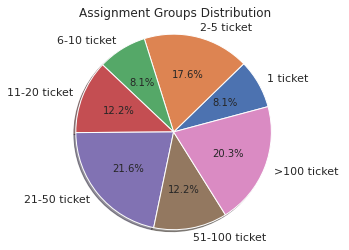

In [ ]:
plt.figure(figsize=(6, 4))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

Total number of categories are 74 so from the above thresholds we will combine the categories with frequency less than 100 to a new group called `"GRP_X"`


In [ ]:
counts = dataset_a["Assignment group"].value_counts()

dataset_a["Assignment group"] = np.where(counts[dataset_a["Assignment group"]] < 100 , "GRP_X", dataset_a["Assignment group"])

dataset_a["Assignment group"].value_counts()

GRP_0     3429
GRP_X     1450
GRP_8      645
GRP_24     285
GRP_12     256
GRP_9      252
GRP_2      241
GRP_19     214
GRP_3      200
GRP_6      183
GRP_13     145
GRP_10     140
GRP_5      128
GRP_14     118
GRP_25     116
GRP_33     107
Name: Assignment group, dtype: int64

###**5. Visualizing different patterns**

Creating a copy of the `dataset_a` and adding relavent columns to visualise

In [ ]:
df = dataset_a.copy()

counts = df["Assignment group"].value_counts()
df["description_length"] = [len(str(x)) for x in df.Description]
df["short_length"] = [len(str(x)) for x in df["Short description"]]

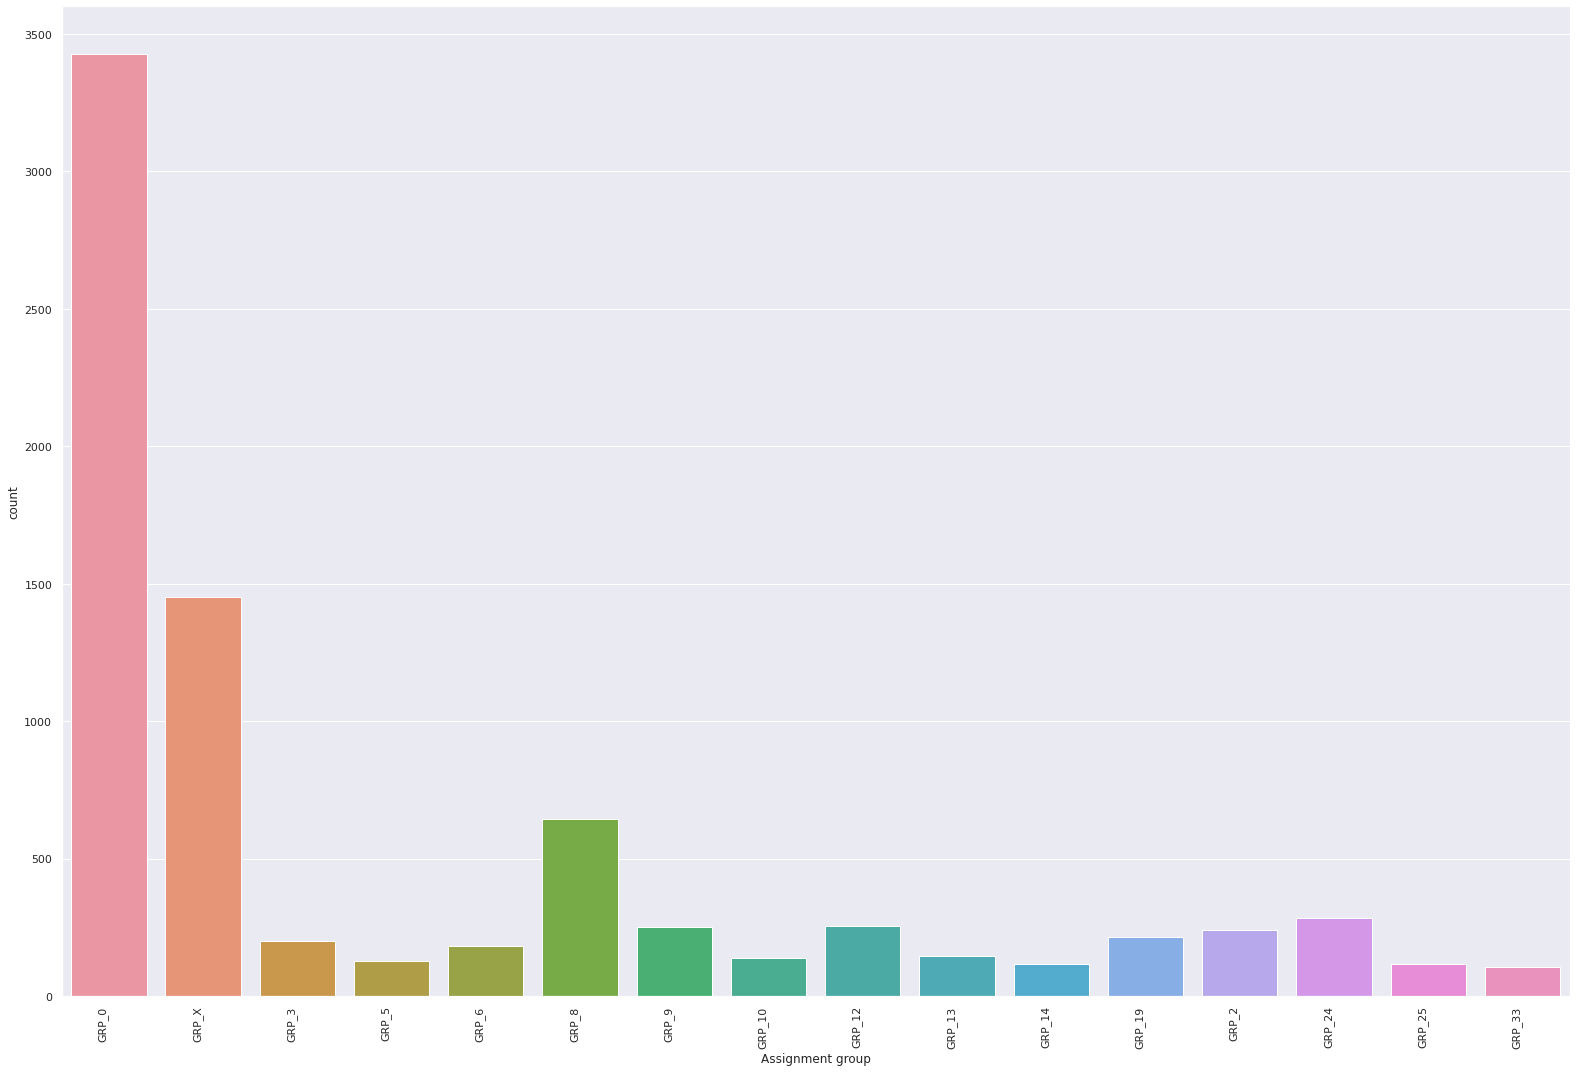

In [ ]:
plt.figure(figsize=(22,15))
ax=sns.countplot(x='Assignment group',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

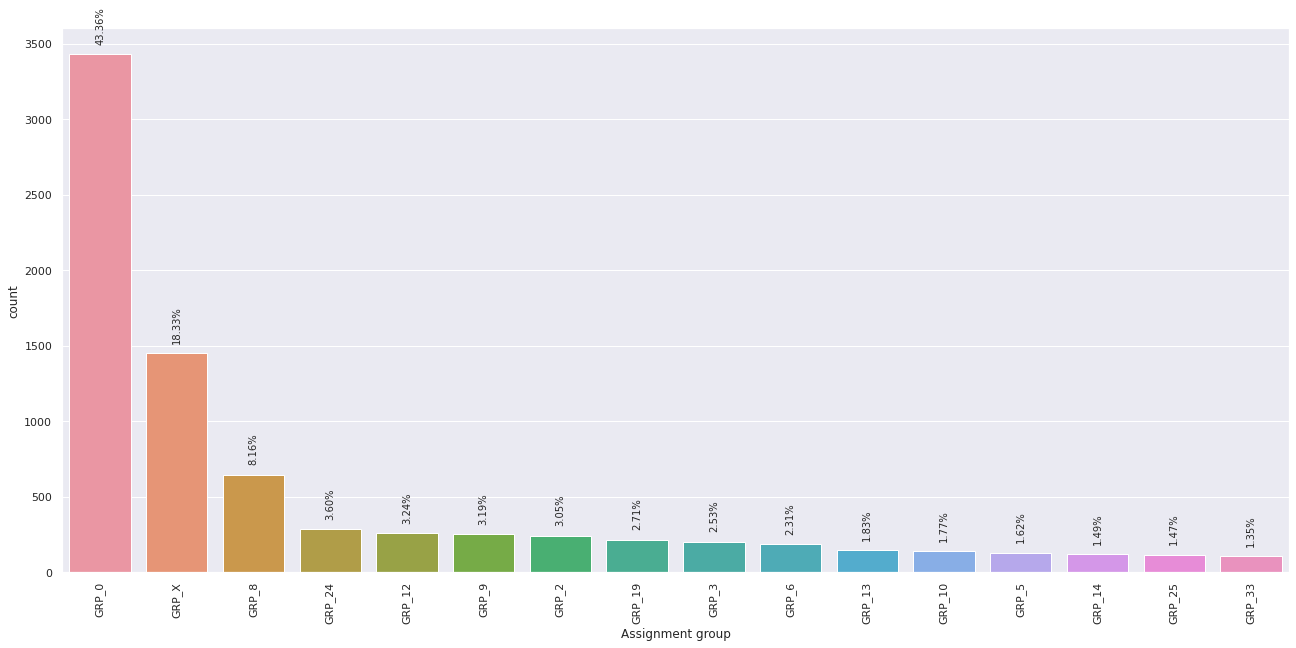

In [ ]:
plt.figure(figsize=(22,10))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

**Visualising `"description_length"`**

In [ ]:
fig = px.box(df, x="description_length")
fig.show()

In [ ]:
fig = px.box(df, y="description_length",x="Assignment group")
fig.show()

**Visualising `"short_length"` ( Length of `Short description` )**

In [ ]:
fig = px.box(df, x="short_length")
fig.show()

In [ ]:
fig = px.box(df, x = "Assignment group", y="short_length")
fig.show()

###**6. Visualizing different text features**

**Length of short description for each assignment group**

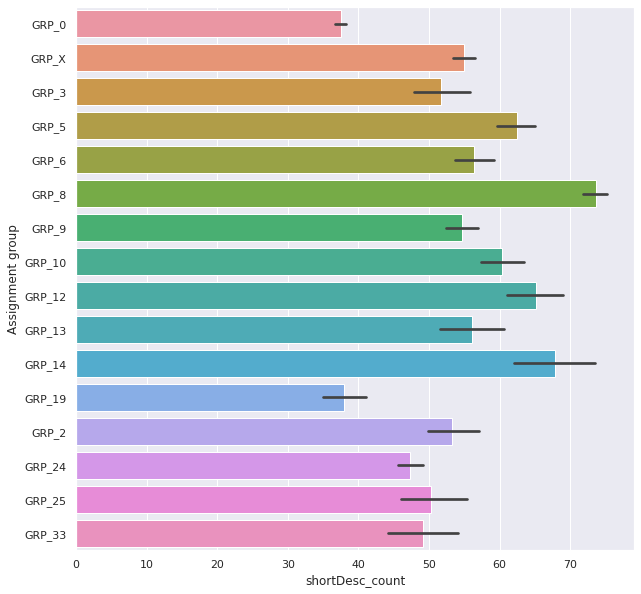

In [ ]:
df_words=df.copy()
df_words["shortDesc_count"] = df["Short description"].apply(lambda x: len(str(x)))
plt.figure(figsize=(10,10))
sns.barplot(x=df_words["shortDesc_count"],y=df_words["Assignment group"])
plt.show()

**The most word used in a short description for each assignment group**

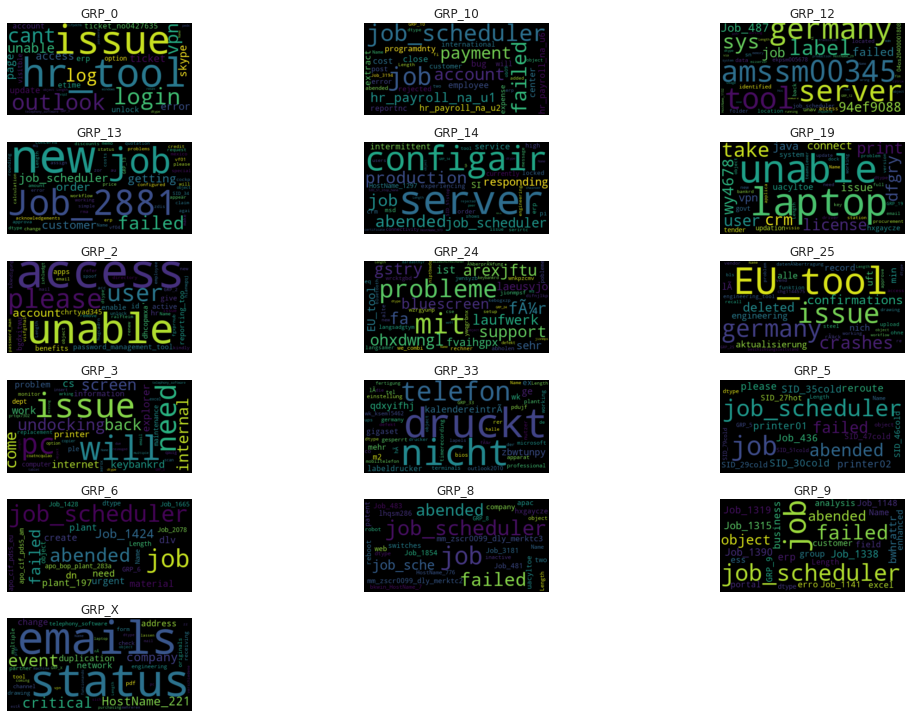

In [ ]:
text = df.groupby("Assignment group")["Short description"].apply(lambda x: "".join(str(x)))
index = 0
plt.figure(figsize=(15,20))
for key,value in text.iteritems():
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(str(value))
    index+=1
    plt.subplot(12,3,index)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(key)
plt.tight_layout()

**Length of Description for each assignment group**

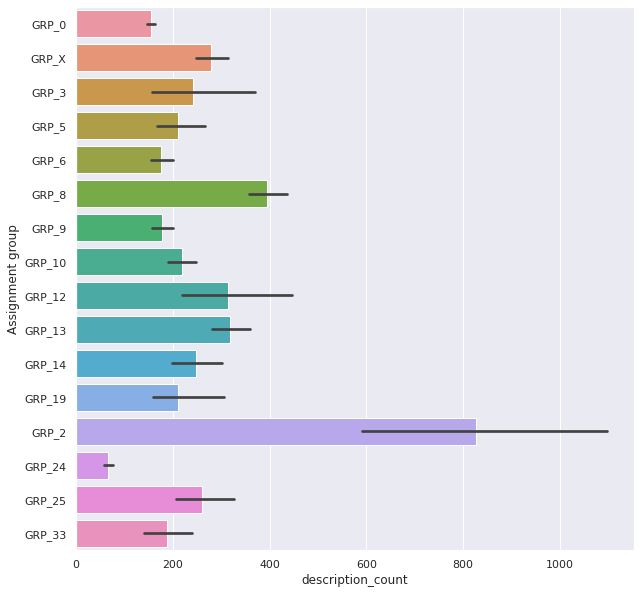

In [ ]:
df_words=df.copy()
df_words["description_count"] = df["Description"].apply(lambda x: len(str(x)))
plt.figure(figsize=(10,10))
sns.barplot(x=df_words["description_count"],y=df_words["Assignment group"])
plt.show()

**The most word used in a Description for each assignment group**

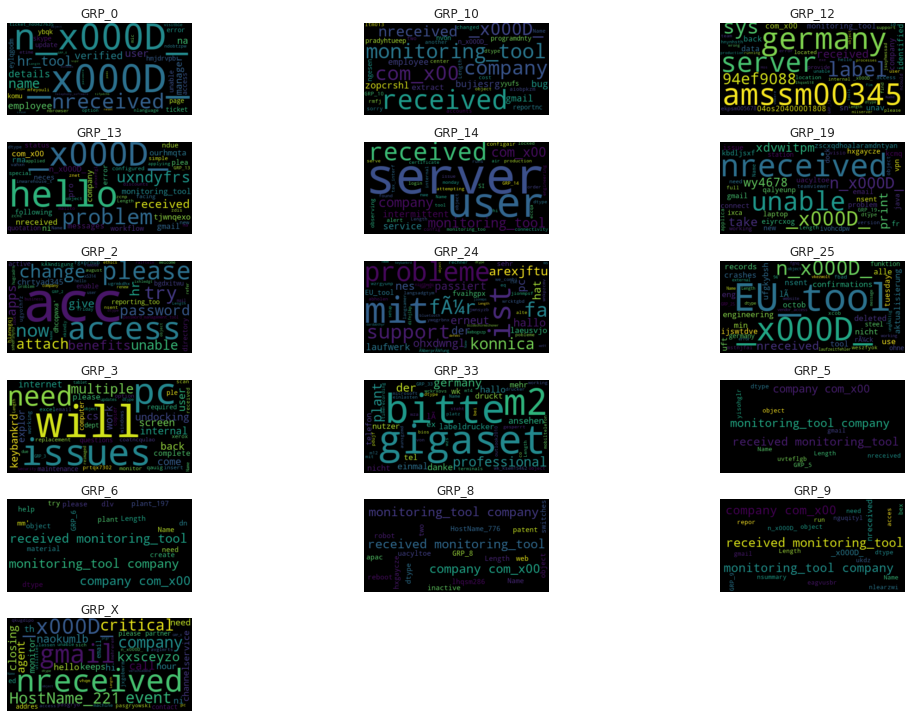

In [ ]:
text = df_words.groupby("Assignment group")["Description"].apply(lambda x: "".join(str(x)))
index = 0
plt.figure(figsize=(15,20))
for key,value in text.iteritems():
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(str(value))
    index+=1
    plt.subplot(12,3,index)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(key)
plt.tight_layout()

Some of the Groups seem to contain non-english words so let us run language detection

#### **Wordclouds for some groups**

**Word Cloud for tickets with Assignment group `'GRP_0'` which is the larest group**

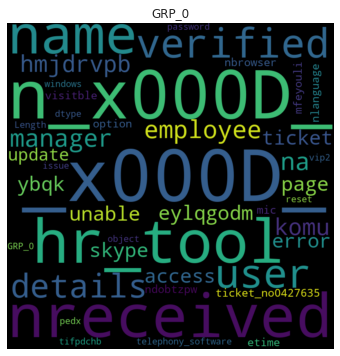

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, stopwords=set(STOPWORDS),min_font_size = 10).generate(str(text["GRP_0"]))

plt.figure(figsize=(6,6),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("GRP_0")
plt.show()


**Word Cloud for tickets with Assignment group `'GRP_24'`**

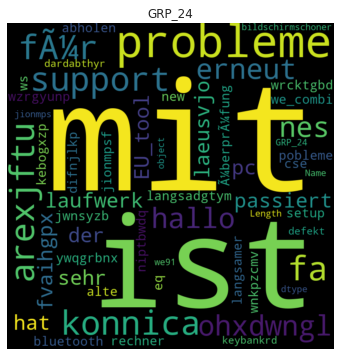

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, stopwords=set(STOPWORDS),min_font_size = 10).generate(str(text["GRP_24"]))

plt.figure(figsize=(6,6),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("GRP_24")
plt.show()

**Word Cloud for tickets with Assignment group `'GRP_33'`**

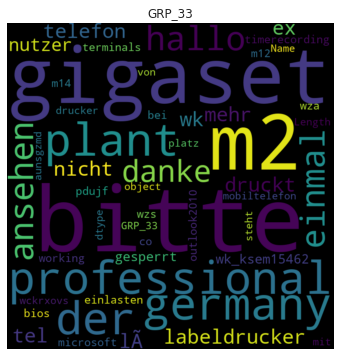

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, stopwords=set(STOPWORDS),min_font_size = 10).generate(str(text["GRP_33"]))

plt.figure(figsize=(6,6),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("GRP_33")
plt.show()

#### **Language detection**

In [ ]:
!pip install langdetect
from langdetect import detect

     |████████████████████████████████| 981 kB 12.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=680f4db36f0690645488f7903acb3c5b67f3357c4d9016bde3496314369afe08
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
def fn_lan_detect(df):                                        
    try:                                                          
        return detect(df)                                      
    except:                                                       
        return 'no'                                                  

df_words['language'] =df_words['Description'].apply(fn_lan_detect)

df_words["language"].value_counts()

en    6593
de     399
af     178
it     109
fr     106
sv      88
no      71
da      65
nl      63
ca      53
es      36
pl      28
pt      26
so      13
sl      13
ro      12
cy       9
tl       8
sq       8
et       6
id       6
fi       6
hr       5
tr       4
cs       2
lt       1
sk       1
Name: language, dtype: int64

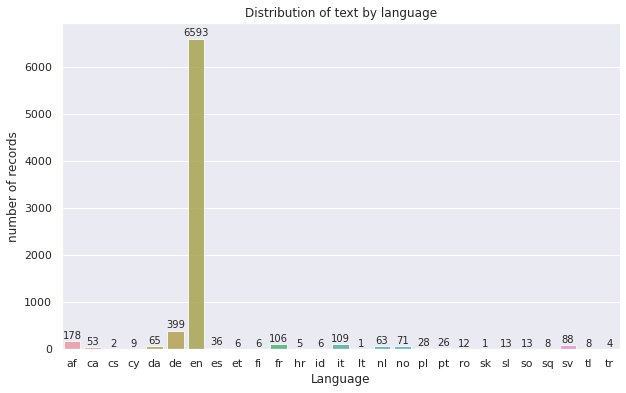

In [ ]:
x = df_words["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
df_words["language"][ df_words["language"]!='en'].value_counts().sum()

1316

### **7. Dealing with missing values**

We had decided to replace the NaN values with empty strings

In [ ]:
print("Before replacing \n")
dataset_a.isna().sum()

Before replacing 



Short description    5
Description          1
Assignment group     0
dtype: int64

In [ ]:
dataset_a.fillna('', inplace=True)

In [ ]:
print("After replacing \n")
dataset_a.isna().sum()

After replacing 



Short description    0
Description          0
Assignment group     0
dtype: int64

### **8. Text preprocessing**

**Combining `Short descriptio`n and `Description` column**

As this is a multi-label classification problem we will merge the Short description and Description columns together, so that all the description terms are together for a particular sentence.

In [ ]:
dataset_a

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4                                          skype error    
...                                                 ...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description Assignment group  
0     -verified user details.(employee# & manager na...            GRP_0  
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...            GRP_0  
2     _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...            GRP_0  
3                         unable to access hr_tool page            GRP_0  
4                                          skype error             GRP_0  
...                                                 ...              ...  
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...            GRP_X  
8496                           telephony_software issue            GRP_0  
8497  vip2: windows password reset for tifpdchb pedx...            GRP_0  
8498  i am unable to access the machine utilities to...            GRP_X  
8499  an mehreren pc`s lassen sich verschiedene prgr...            GRP_X  

[7909 rows x 3 columns]

In [ ]:
dataset_a['Text']=dataset_a.apply(lambda col : [col['Short description'],col['Description']], axis=1)
dataset_a.drop(labels =['Short description', 'Description'], axis = 1,inplace = True)

dataset_a

Assignment group                                               Text
0               GRP_0  [login issue, -verified user details.(employee...
1               GRP_0  [outlook, _x000D_\n_x000D_\nreceived from: hmj...
2               GRP_0  [cant log in to vpn, _x000D_\n_x000D_\nreceive...
3               GRP_0  [unable to access hr_tool page, unable to acce...
4               GRP_0                       [skype error , skype error ]
...               ...                                                ...
8495            GRP_X  [emails not coming in from zz mail, _x000D_\n_...
8496            GRP_0  [telephony_software issue, telephony_software ...
8497            GRP_0  [vip2: windows password reset for tifpdchb ped...
8498            GRP_X  [machine nÃ£o estÃ¡ funcionando, i am unable t...
8499            GRP_X  [an mehreren pc`s lassen sich verschiedene prg...

[7909 rows x 2 columns]

Sample of merged `"Text"` Column

In [ ]:
dataset_a['Text'][1]

['outlook',
 '_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind ']

In [ ]:
dataset_text =dataset_a[['Text']]
dataset_text["Text"] = dataset_text["Text"].astype(str)

dataset_text.head() 

Text
0  ['login issue', '-verified user details.(emplo...
1  ['outlook', '_x000D_\n_x000D_\nreceived from: ...
2  ['cant log in to vpn', '_x000D_\n_x000D_\nrece...
3  ['unable to access hr_tool page', 'unable to a...
4                   ['skype error ', 'skype error ']

**Removing unwanted characters and numbers**

In [ ]:
dataset_text["Text"]=dataset_text["Text"].str.replace('[^A-Za-z]',' ')

dataset_text.head()

Text
0    login issue     verified user details  emplo...
1    outlook     x   D  n x   D  nreceived from  ...
2    cant log in to vpn     x   D  n x   D  nrece...
3    unable to access hr tool page    unable to a...
4                     skype error     skype error

**Converting to lower case**

In [ ]:
dataset_text["Text"] = dataset_text["Text"].str.lower()

dataset_text.head()

Text
0    login issue     verified user details  emplo...
1    outlook     x   d  n x   d  nreceived from  ...
2    cant log in to vpn     x   d  n x   d  nrece...
3    unable to access hr tool page    unable to a...
4                     skype error     skype error

**Removing unnecessary white spaces**

In [ ]:
dataset_text["Text"]= dataset_text["Text"].str.strip()

dataset_text.head()

Text
0  login issue     verified user details  employe...
1  outlook     x   d  n x   d  nreceived from  hm...
2  cant log in to vpn     x   d  n x   d  nreceiv...
3  unable to access hr tool page    unable to acc...
4                        skype error     skype error

**Removing stop words**

we will get the list of stopwords from nltk library

In [ ]:
sw = stopwords.words('english')

np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
dataset_text["Text"]= dataset_text["Text"].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))

dataset_text.head()

Text
0  login issue verified user details employee man...
1  outlook x n x nreceived hmjdrvpb komuaywn gmai...
2  cant log vpn x n x nreceived eylqgodm ybqkwiam...
3  unable access hr tool page unable access hr to...
4                            skype error skype error

**Performing Lemmatization**

In [ ]:

stemmer = PorterStemmer() #set stemmer
lemmatizer = WordNetLemmatizer() # set lemmatizer

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
    

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
for index, row in dataset_text.iterrows():

  dataset_text.at[index, 'Text']= lemmatize_sentence(row["Text"])

dataset_text.head()

Text
0  login issue verify user detail employee manage...
1  outlook x n x nreceived hmjdrvpb komuaywn gmai...
2  cant log vpn x n x nreceived eylqgodm ybqkwiam...
3  unable access hr tool page unable access hr to...
4                            skype error skype error

**Replacing the Text coulmn of dataset**

In [ ]:
dataset_a['Text']=dataset_text['Text']

dataset_a.head()

Assignment group                                               Text
0            GRP_0  login issue verify user detail employee manage...
1            GRP_0  outlook x n x nreceived hmjdrvpb komuaywn gmai...
2            GRP_0  cant log vpn x n x nreceived eylqgodm ybqkwiam...
3            GRP_0  unable access hr tool page unable access hr to...
4            GRP_0                            skype error skype error

**Visualising the text column after processing**

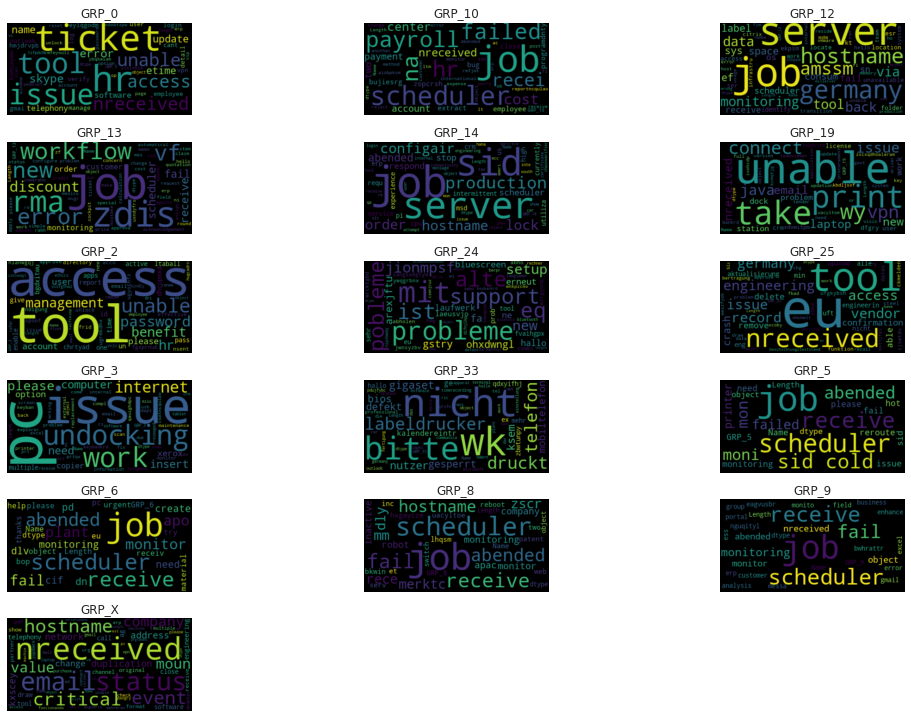

In [ ]:
text = dataset_a.groupby("Assignment group")["Text"].apply(lambda x: "".join(str(x)))
index = 0
plt.figure(figsize=(15,20))

for key,value in text.iteritems():

    wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(str(value))
    index+=1
    plt.subplot(12,3,index)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(key)
plt.tight_layout()

**Language Translation**

In [ ]:
def fn_lan_detect(df):                                        
    try:                                                          
        return detect(df)                                      
    except:                                                       
        return 'no'    

df_test = dataset_a.copy()                                              

df_test['language'] =df_test['Text'].apply(fn_lan_detect)

df_test["language"].value_counts()

en    5819
fr     413
de     380
af     326
sv     138
nl     115
ca     112
no      93
it      93
so      76
da      59
ro      56
es      54
pl      50
pt      31
cy      23
sl      14
et      13
sq      11
id       5
tl       5
hr       5
vi       4
cs       4
fi       4
lt       3
sk       3
Name: language, dtype: int64

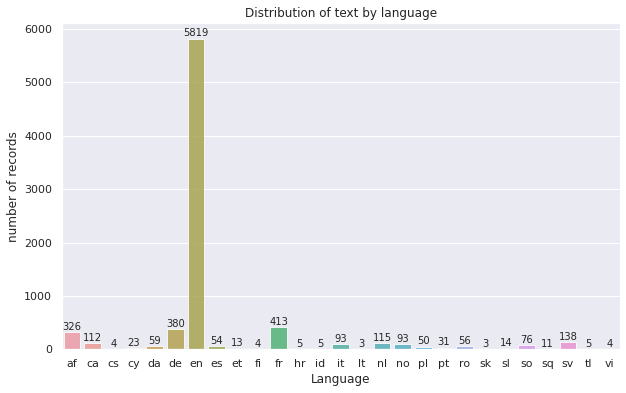

In [ ]:
x = df_test["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
new_df = df_test[ df_words["language"] != "en"]

In [ ]:
new_df

Assignment group                                               Text  \
4               GRP_0                            skype error skype error   
14              GRP_0            unable open payslip unable open payslip   
19              GRP_0                    unable sign vpn unable sign vpn   
20              GRP_0          unable check payslip unable check payslip   
22              GRP_0              unable connect vpn unable connect vpn   
...               ...                                                ...   
8465            GRP_X        vpn x vpn x xad atcbvglq bdvmuszt gmail com   
8471            GRP_X                                        x x x f x x   
8475            GRP_0  etime time card update information etime time ...   
8486            GRP_0          ticket update ticket ticket update ticket   
8499            GRP_X  mehreren pc lassen sich verschiedene prgramdnt...   

     language  
4          no  
14         fr  
19         fr  
20         fr  
22         fr  
...       ...  
8465       ca  
8471       so  
8475       it  
8486       sv  
8499       de  

[1316 rows x 3 columns]

In [ ]:
!pip install deep-translator
from deep_translator import GoogleTranslator


     |████████████████████████████████| 97 kB 4.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
len(new_df)

1316

In [ ]:
new_df

Assignment group                                               Text  \
4               GRP_0                            skype error skype error   
14              GRP_0            unable open payslip unable open payslip   
19              GRP_0                    unable sign vpn unable sign vpn   
20              GRP_0          unable check payslip unable check payslip   
22              GRP_0              unable connect vpn unable connect vpn   
...               ...                                                ...   
8465            GRP_X        vpn x vpn x xad atcbvglq bdvmuszt gmail com   
8471            GRP_X                                        x x x f x x   
8475            GRP_0  etime time card update information etime time ...   
8486            GRP_0          ticket update ticket ticket update ticket   
8499            GRP_X  mehreren pc lassen sich verschiedene prgramdnt...   

     language  
4          no  
14         fr  
19         fr  
20         fr  
22         fr  
...       ...  
8465       ca  
8471       so  
8475       it  
8486       sv  
8499       de  

[1316 rows x 3 columns]

In [ ]:
df_test["Text"][0]

'login issue verify user detail employee manager name x n check user name ad reset password x n advise user login check x n caller confirm able login x n issue resolve'

In [ ]:
for i, row in df_test.iterrows():

  if (row["language"] != "en"):
  
    try :
      df_test["Text"][i] = GoogleTranslator(source='auto', target='en').translate(row['Text'])
    except :
      df_test["Text"][i]  = row["Text"]



In [ ]:
df_test

Assignment group                                               Text  \
0               GRP_0  login issue verify user detail employee manage...   
1               GRP_0  outlook x n x nreceived hmjdrvpb komuaywn gmai...   
2               GRP_0  cant log vpn x n x nreceived eylqgodm ybqkwiam...   
3               GRP_0  unable access hr tool page unable access hr to...   
4               GRP_0                            skype error skype error   
...               ...                                                ...   
8495            GRP_X  email come zz mail x n x nreceived avglmrts vh...   
8496            GRP_0  telephony software issue telephony software issue   
8497            GRP_0  vip window password reset tifpdchb pedxruyf vi...   
8498            GRP_X  machine n est funcionando unable access machin...   
8499            GRP_X  different programs cannot be opened with sever...   

     language  
0          en  
1          en  
2          vi  
3          en  
4          no  
...       ...  
8495       ro  
8496       en  
8497       en  
8498       en  
8499       de  

[7909 rows x 3 columns]

In [ ]:
dataset_a["Text"] = df_test["Text"]

**Taking care of unbalanced data**

Even after merging groups with less than or equal to 100 tickets together we have class imbalance issue.So we need to resample the dataset

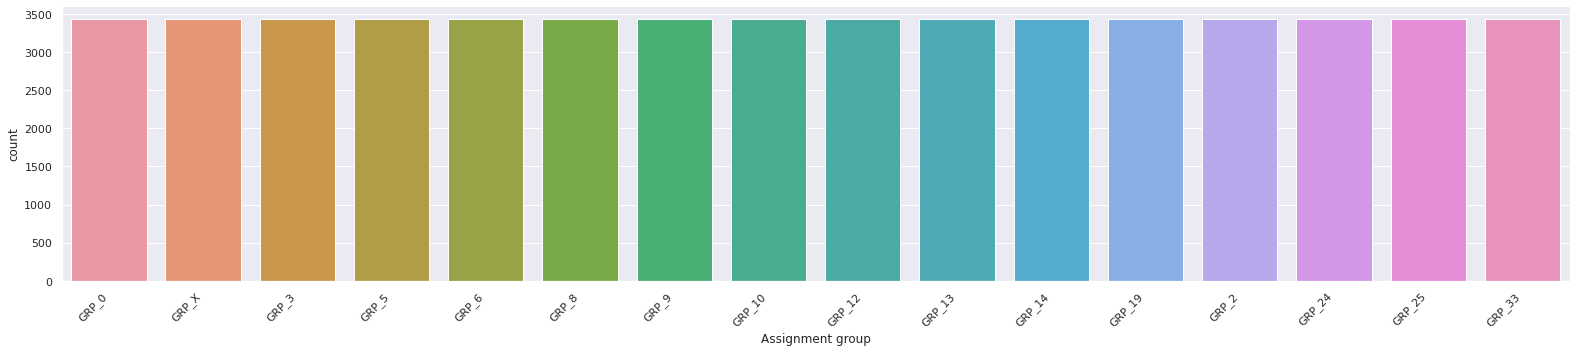

In [ ]:
maxOthers =dataset_a["Assignment group"].value_counts().max()

dataset_resampled = dataset_a[0:0]
for grp in dataset_a['Assignment group'].unique():
    ticket_dataset_group = dataset_a[dataset_a['Assignment group'] == grp]
    resampled = resample(ticket_dataset_group, replace=True, n_samples=int(maxOthers), random_state=123)
    dataset_resampled = dataset_resampled.append(resampled)
    

descending_order = dataset_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))

ax=sns.countplot(x='Assignment group', data=dataset_resampled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

### **9. Creating word vocabulary from the corpus of report text data**

In [ ]:
word_counts=dict()

for words in dataset_resampled.Text.str.split():
    for word in words:
        if word in word_counts:
            word_counts[str(word)]+=1
        else:
            word_counts[str(word)]=1

word_counts

{'erp': 11405,
 'login': 1847,
 'trouble': 154,
 'x': 178853,
 'n': 154389,
 'nreceived': 7177,
 'xosycftu': 12,
 'olhpmsdw': 12,
 'gmail': 11454,
 'com': 27355,
 'nhello': 3122,
 'nplease': 4695,
 'see': 4241,
 'error': 8643,
 'ni': 3243,
 'log': 1937,
 'tell': 278,
 'solution': 267,
 'frequent': 68,
 'account': 3883,
 'lock': 908,
 'nran': 34,
 'status': 1527,
 'naccount': 45,
 'get': 5171,
 'one': 1782,
 'wifi': 399,
 'device': 1545,
 'ntook': 2,
 'control': 477,
 'machine': 1260,
 'start': 2859,
 'credential': 201,
 'manager': 1429,
 'service': 3094,
 'ndeleted': 5,
 'bunch': 13,
 'password': 3995,
 'save': 651,
 'nasked': 2,
 'user': 8299,
 'remove': 719,
 'company': 21333,
 'secure': 26,
 'mobile': 383,
 'keep': 572,
 'disabled': 16,
 'couple': 89,
 'day': 1017,
 'enable': 227,
 'home': 414,
 'nalso': 161,
 'undock': 2,
 'computer': 2203,
 'dock': 687,
 'back': 1454,
 'tried': 222,
 'work': 9031,
 'nlocked': 2,
 'system': 6844,
 'unlock': 759,
 'difficulty': 25,
 'nkeeping': 2,
 

In [ ]:
print("Total number of words in the dictionary : ", len(word_counts))

Total number of words in the dictionary :  13412


### **10. Creating Tokens**

In [ ]:
dataset_resampled["text_tokens"] = [ word_tokenize(txt) for txt in dataset_resampled["Text"] ]

dataset_resampled.head()

Assignment group                                               Text  \
3131            GRP_0  erp login trouble x n x nreceived xosycftu olh...   
2584            GRP_0  frequent account lock frequent account lock x ...   
4247            GRP_0  login issue x nlogin issue x n verify user det...   
7560            GRP_0        engineering tool work engineering tool work   
5250            GRP_0  able access sid n nreceived miecoszw mhvbnodw ...   

                                            text_tokens  
3131  [erp, login, trouble, x, n, x, nreceived, xosy...  
2584  [frequent, account, lock, frequent, account, l...  
4247  [login, issue, x, nlogin, issue, x, n, verify,...  
7560  [engineering, tool, work, engineering, tool, w...  
5250  [able, access, sid, n, nreceived, miecoszw, mh...

## **Model Building**

### **Tokenization and encoding**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble

import  numpy, textblob, string

In [ ]:
top_k = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(dataset_resampled['Text'])

In [ ]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [ ]:
train_seqs = tokenizer.texts_to_sequences(dataset_resampled['Text'])

Finding length distribution of the sequences

In [ ]:
fig = px.box( x=[ len(y) for y in train_seqs])
fig.show()

### **Creating function "evaluate_model" for evaluating the models in the same way**

In [ ]:
max_features = 10000
maxlen = 300
embedding_size = 200

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post',maxlen=maxlen)

Y = dataset_resampled["Assignment group"].astype("category")

In [ ]:
Y.dtype

CategoricalDtype(categories=['GRP_0', 'GRP_10', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_19',
                  'GRP_2', 'GRP_24', 'GRP_25', 'GRP_3', 'GRP_33', 'GRP_5',
                  'GRP_6', 'GRP_8', 'GRP_9', 'GRP_X'],
, ordered=False)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(43891, 300) (43891,)
(10973, 300) (10973,)


In [ ]:
encoder = LabelEncoder()
train_y = encoder.fit_transform(Y_train)
test_y = encoder.fit_transform(Y_test)

In [ ]:
def evaluate_model(model, x_train, y_train, x_test, y_test):

  model.fit(x_train,y_train)

  train_acc = metrics.accuracy_score( y_train, model.predict(x_train) ) 
  test_acc  = metrics.accuracy_score( y_test , model.predict(x_test ) )

  con_mat = metrics.confusion_matrix(y_test , model.predict(x_test ))


  print("Train Accuracy -> ",round(train_acc *100,2),"%")
  print("Test  Accuracy -> ",round(test_acc  *100,2),"%")
  print("F1 score       -> ",metrics.f1_score( y_test , model.predict(x_test ), average='micro'))

  print("\n")

  fig = px.imshow(con_mat,labels=dict(x="Prediction", y="Real", color="Count"),
                x=encoder.classes_,
                y=encoder.classes_)
  fig.show()


###**Testing Models**

**Naive Bayes**

In [ ]:
evaluate_model(naive_bayes.MultinomialNB() ,X_train, train_y, X_test, test_y )

Train Accuracy ->  15.33 %
Test  Accuracy ->  14.78 %
F1 score       ->  0.14781736990795588




**Logistic Regression**

In [ ]:
evaluate_model(linear_model.LogisticRegression() ,X_train, train_y, X_test, test_y )

Train Accuracy ->  27.14 %
Test  Accuracy ->  26.42 %
F1 score       ->  0.2641939305568213




**SVM**

In [ ]:
evaluate_model(svm.SVC() ,X_train, train_y, X_test, test_y )

Train Accuracy ->  63.29 %
Test  Accuracy ->  61.28 %
F1 score       ->  0.6127768158206507




**Random Forest**

In [ ]:
evaluate_model(ensemble.RandomForestClassifier() ,X_train, train_y, X_test, test_y )

Train Accuracy ->  92.19 %
Test  Accuracy ->  90.96 %
F1 score       ->  0.9095962817825571




**KNN Classifier**

In [ ]:
evaluate_model(KNeighborsClassifier(n_neighbors= 5 , weights = 'distance') ,X_train, train_y, X_test, test_y )

Train Accuracy ->  89.73 %
Test  Accuracy ->  86.69 %
F1 score       ->  0.8669461405267475




**DecisionTree**

In [ ]:
model = DecisionTreeClassifier(criterion = "entropy")

evaluate_model(model ,X_train, train_y, X_test, test_y )

Train Accuracy ->  92.19 %
Test  Accuracy ->  89.92 %
F1 score       ->  0.8992071448099882




**ADABoosting**

In [ ]:
evaluate_model(AdaBoostClassifier(n_estimators=50,random_state=1) ,X_train, train_y, X_test, test_y )

Train Accuracy ->  21.43 %
Test  Accuracy ->  21.47 %
F1 score       ->  0.2147088307664267




**Gradient Boosting**

In [ ]:
evaluate_model(GradientBoostingClassifier(n_estimators = 50,random_state=1) ,X_train, train_y, X_test, test_y )

Train Accuracy ->  73.28 %
Test  Accuracy ->  71.05 %
F1 score       ->  0.710471156474984




**Bagging**

In [ ]:
dTreeR = DecisionTreeClassifier()
evaluate_model(BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1) ,X_train, train_y, X_test, test_y )

Train Accuracy ->  92.19 %
Test  Accuracy ->  90.5 %
F1 score       ->  0.9050396427595006




**SGD Classifier**

In [ ]:
evaluate_model(SGDClassifier(loss="hinge", penalty="l2") ,X_train, train_y, X_test, test_y )

Train Accuracy ->  20.07 %
Test  Accuracy ->  19.99 %
F1 score       ->  0.19994532033172333




**Comparing models using LazyText**

In [ ]:
!pip install lazytext
from lazytext.supervised import LazyTextPredict

lazy_text = LazyTextPredict(
    classification_type="multiclass",
    )

print(lazy_text.get_all_classifiers)

models = lazy_text.fit(X_train, X_test, train_y, test_y)



     |████████████████████████████████| 23.2 MB 1.7 MB/s 
     |████████████████████████████████| 217 kB 50.6 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


Output()

Training AdaBoostClassifier estimator

{'AdaBoostClassifier': <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble._bagging.BaggingClassifier'>, 'BernoulliNB': <class 'sklearn.naive_bayes.BernoulliNB'>, 'CalibratedClassifierCV': <class 'sklearn.calibration.CalibratedClassifierCV'>, 'ComplementNB': <class 'sklearn.naive_bayes.ComplementNB'>, 'DecisionTreeClassifier': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'DummyClassifier': <class 'sklearn.dummy.DummyClassifier'>, 'ExtraTreeClassifier': <class 'sklearn.tree._classes.ExtraTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>, 'KNeighborsClassifier': <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm._classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'LogisticRegressionCV':

Training BaggingClassifier estimator

Training BernoulliNB estimator

Training CalibratedClassifierCV estimator

Training ComplementNB estimator

Training DecisionTreeClassifier estimator

Training DummyClassifier estimator

Training ExtraTreeClassifier estimator

Training ExtraTreesClassifier estimator

Training GradientBoostingClassifier estimator

Training KNeighborsClassifier estimator

Training LinearSVC estimator

Training LogisticRegression estimator

Training LogisticRegressionCV estimator

Training MLPClassifier estimator

Training MultinomialNB estimator

Training NearestCentroid estimator

Training NuSVC estimator

Training PassiveAggressiveClassifier estimator

Training Perceptron estimator

Training RandomForestClassifier estimator

Training RidgeClassifier estimator

Training SGDClassifier estimator

Training SVC estimator

                                       Result Analysis                                       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳┳┓
┃ Model                     ┃ Accuracy          ┃ Balanced Accuracy ┃ F1 Score            ┃┃┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇╇┩
│ AdaBoostClassifier        │ 0.21470883076642… │ 0.21574487438851… │ 0.1989704548323668  │││
│ BaggingClassifier         │ 0.90294358880889… │ 0.90230347364342… │ 0.9078010401975063  │││
│ BernoulliNB               │ 0.17488380570491… │ 0.17542266443754… │ 0.11146512334545577 │││
│ CalibratedClassifierCV    │ 0.23293538685865… │ 0.23412049838176… │ 0.19363065316714978 │││
│ ComplementNB              │ 0.12913514991342… │ 0.13012322236087… │ 0.10548330616814479 │││
│ DecisionTreeClassifier    │ 0.89784015310307… │ 0.89727184372477… │ 0.9023135753058475  │││
│ DummyClassifier           │ 0.05987423676296… │ 0.0625            │ 0.0070614789337919… │││
│ ExtraTreeClassifier       │ 0.89866034812722… │ 0.89809149253015… │ 0.9032641728144752  │││
│ ExtraTreesClassifier      │ 0.90977854734347… │ 0.90899424596747… │ 0.9149950807407792  │││
│ GradientBoostingClassifi… │ 0.80588717761778… │ 0.806337022169324 │ 0.80603973958625    │││
│ KNeighborsClassifier      │ 0.823749202588171 │ 0.82550204926477… │ 0.8176615458943616  │││
│ LinearSVC                 │ 0.10079285519001… │ 0.10179830191988… │ 0.090160011124007   │││
│ LogisticRegression        │ 0.26419393055682… │ 0.26494003077250… │ 0.2593797306251261  │││
│ LogisticRegressionCV      │ 0.27112002187186… │ 0.27173874908486… │ 0.26661835950072477 │││
│ MLPClassifier             │ 0.74619520641574… │ 0.74717998972350… │ 0.7509030212329035  │││
│ MultinomialNB             │ 0.14781736990795… │ 0.14896905187543… │ 0.1267277805899355  │││
│ NearestCentroid           │ 0.17980497584981… │ 0.18123025805248… │ 0.155788160915052   │││
│ NuSVC                     │ 0.54880160393693… │ 0.54849568335512… │ 0.5492471563849667  │││
│ PassiveAggressiveClassif… │ 0.21407090130319… │ 0.21406388978498… │ 0.19889440949761428 │││
│ Perceptron                │ 0.17962271028889… │ 0.17959800973142… │ 0.1909172492037351  │││
│ RandomForestClassifier    │ 0.908776086758407 │ 0.90798843170886… │ 0.9140067883343734  │││
│ RidgeClassifier           │ 0.24879249065889  │ 0.25066819981446… │ 0.22833549926773059 │││
│ SGDClassifier             │ 0.189373917798232 │ 0.18977828607895… │ 0.18661854583824933 │││
│ SVC                       │ 0.61277681582065… │ 0.61192608695007… │ 0.6223427738297788  │││
└───────────────────────────┴───────────────────┴───────────────────┴─────────────────────┴┴┘

---

####**In-depth analysis / fine-tuning of Random Forest**

We did grid search with varying parameters to optimise the model. But, we are unable to get beyond 91.07% test accuracy and 92% train accuracy.

**NOTE: The following code will take a very long time to execute. so after trial we have commented it out to save time**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'n_estimators': [100, 200, 300, 1000]
# }# Create a based model
# rf = ensemble.RandomForestClassifier()# Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# param_grid = {
#     'max_depth': [50, 60, 70],
#     'max_features': [5,10 ,20],
#     'n_estimators': [800, 1000, 1200]
# }# Create a based model
# rf = ensemble.RandomForestClassifier()# Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# grid_search.fit(X_train, train_y)
# grid_search.best_params_

In [ ]:
# best_random = grid_search.best_estimator_

# y_pred = best_random.predict(X_test )

# train_acc = metrics.accuracy_score( train_y, best_random.predict(X_train) ) 
# test_acc  = metrics.accuracy_score( test_y , y_pred )

# con_mat = metrics.confusion_matrix(test_y ,y_pred)


# print("Train Accuracy -> ",round(train_acc *100,2),"%")
# print("Test  Accuracy -> ",round(test_acc  *100,2),"%")
# print("F1 score       -> ",metrics.f1_score( test_y , y_pred, average='micro'))

# print("\n")

# fig = px.imshow(con_mat)
# fig.show()

---

## **Test the Model, Fine-tuning and Repeat**

### **Comparison of models**

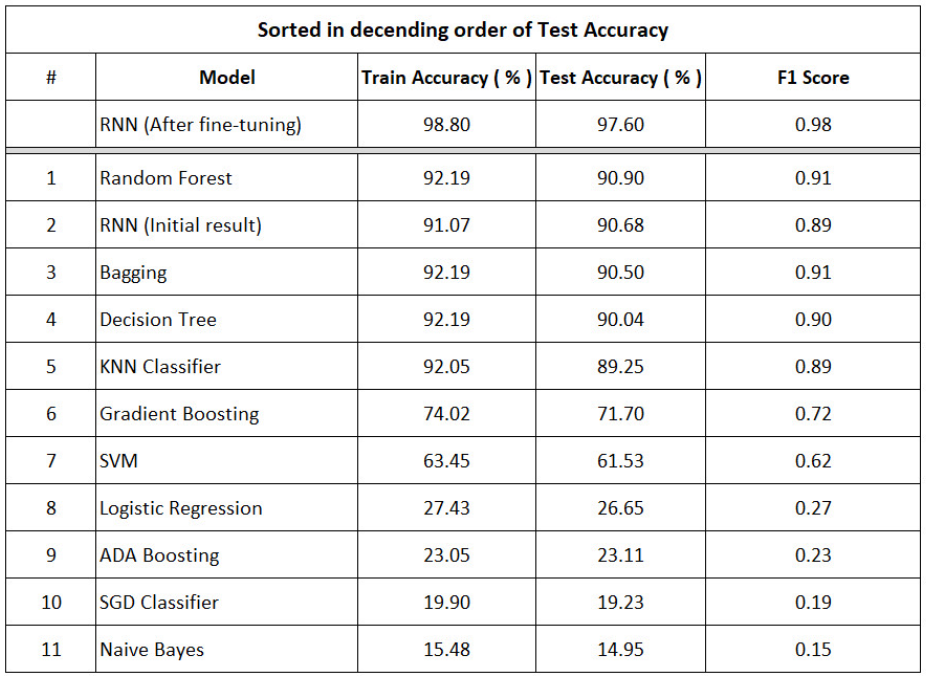

**Comparing models using LazyText**

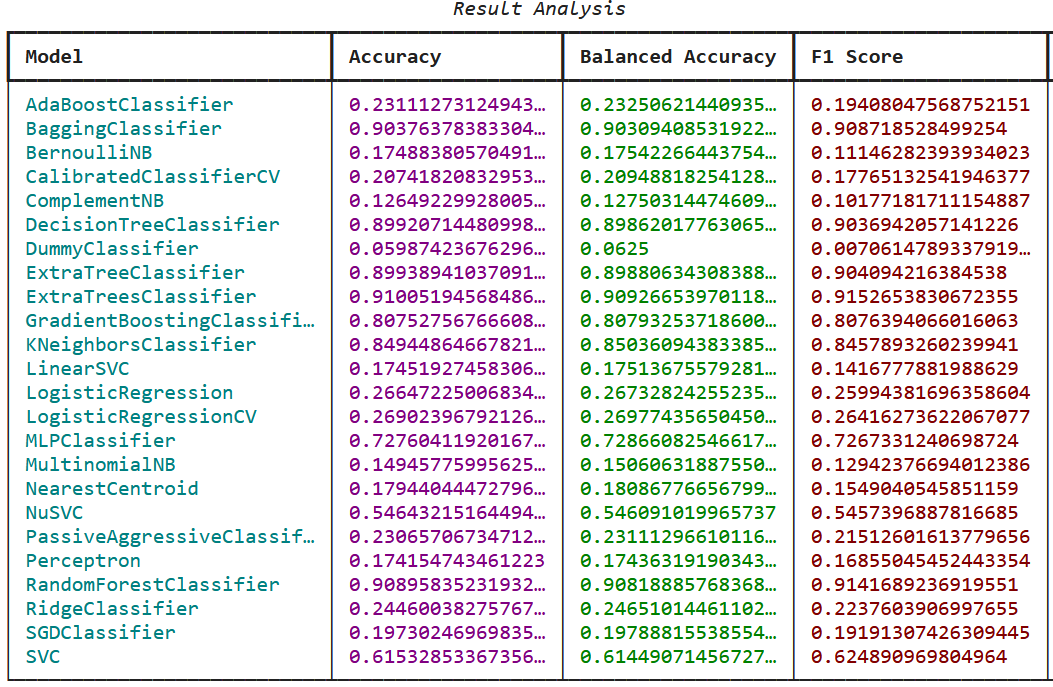

From the above comparison RNN shows the best results so we decided to use RNN as our final model for automatic ticket prediction.

### **Final Model - RNN**

**Importing Packages**

In [ ]:
!pip install langdetect
!pip install deep-translator

import numpy as np
import pandas as pd
import tensorflow as tf

from langdetect import detect
from deep_translator import GoogleTranslator

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, GRU, Conv1D, MaxPooling1D, Bidirectional


####**Importing the dataset**

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone project/input_data.xlsx')
dataset.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

####**Merging the "Short description" and "Description" and Removing unnecessary Columns**

In [ ]:
dataset["Text"] = dataset["Short description"] + " " + dataset["Description"]

dataset.drop(["Short description","Description","Caller"],axis=1,inplace=True)

dataset

Assignment group                                               Text
0               GRP_0  login issue -verified user details.(employee# ...
1               GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2               GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...
3               GRP_0  unable to access hr_tool page unable to access...
4               GRP_0                          skype error  skype error 
...               ...                                                ...
8495           GRP_29  emails not coming in from zz mail _x000D_\n_x0...
8496            GRP_0  telephony_software issue telephony_software issue
8497            GRP_0  vip2: windows password reset for tifpdchb pedx...
8498           GRP_62  machine nÃ£o estÃ¡ funcionando i am unable to ...
8499           GRP_49  an mehreren pc`s lassen sich verschiedene prgr...

[8500 rows x 2 columns]

####**Removing Unwanted Characters**

we tried different methods to remove the unwanted characters but the below method resulted in higher accuracy of our final model.

In [ ]:
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')


def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset


def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n

    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces

    return regexList

In [ ]:
columnsToClean = ['Text']

clean_dataset = cleanDataset(dataset, columnsToClean, getRegexList())

clean_dataset

Assignment group                                               Text
0               GRP_0  login issue verified user details employee  ma...
1               GRP_0  outlook d d  from  d hello team d d meetings s...
2               GRP_0  cant log to vpn d d  from  d d d cannot log to...
3               GRP_0    unable access tool page unable access tool page
4               GRP_0                           skype error skype error 
...               ...                                                ...
8495           GRP_29  emails not coming from mail d d  from  d good ...
8496            GRP_0  telephony software issue telephony software issue
8497            GRP_0  vip  windows password reset for tifpdchb pedxr...
8498           GRP_62  machine o est funcionando unable access the ma...
8499           GRP_49  an mehreren lassen sich verschiedene prgramdnt...

[8500 rows x 2 columns]

####**Language Translation to English**

We are using langdetect to identify the language and GoogleTranslate to translate non-English rows to English

In [ ]:
def fn_lan_detect(df):                                        
    try:                                                          
        return detect(df)                                      
    except:                                                       
        return 'no'    

clean_dataset['language'] =clean_dataset['Text'].apply(fn_lan_detect)

clean_dataset["language"].value_counts()

en    6169
sl     444
de     393
fr     318
af     305
da     162
no     155
sv     128
ca     104
it      72
nl      64
es      49
pl      26
tl      15
hr      13
sq      13
ro      13
cy      12
et      11
pt       9
id       7
sk       4
lt       3
cs       3
so       3
fi       3
vi       1
lv       1
Name: language, dtype: int64

In [ ]:
total = len(clean_dataset)

for i, row in clean_dataset.iterrows():

  if (row["language"] != "en"):
  
    try :
      clean_dataset["Text"][i] = GoogleTranslator(source='auto', target='en').translate(row['Text'])
    except :
      clean_dataset["Text"][i]  = row["Text"]
  print(f"entrys completed : {i}/{total}",end="\r")
  

In [ ]:
clean_dataset.drop("language",axis=1,inplace=True)
clean_dataset

Assignment group                                               Text
0               GRP_0  login issue verified user details employee  ma...
1               GRP_0  outlook d d  from  d hello team d d meetings s...
2               GRP_0  cant log to vpn d d  from  d d d cannot log to...
3               GRP_0    unable access tool page unable access tool page
4               GRP_0                            skype error skype error
...               ...                                                ...
8495           GRP_29  emails not coming from mail d d  from  d good ...
8496            GRP_0  telephony software issue telephony software issue
8497            GRP_0  vip  windows password reset for tifpdchb pedxr...
8498           GRP_62  machine o est funcionando unable access the ma...
8499           GRP_49  different programs cannot be opened on several...

[8500 rows x 2 columns]

####**Grouping the Classes**

In [ ]:
clean_dataset.drop_duplicates(inplace = True)
clean_dataset.fillna('', inplace=True)


In [ ]:
counts = clean_dataset["Assignment group"].value_counts()

clean_dataset["Assignment group"] = np.where(counts[clean_dataset["Assignment group"]] < 100 , "GRP_X", clean_dataset["Assignment group"])

clean_dataset["Assignment group"].value_counts()

GRP_0     3198
GRP_X     1688
GRP_8      329
GRP_24     277
GRP_12     245
GRP_2      241
GRP_19     214
GRP_3      200
GRP_13     142
GRP_14     118
GRP_25     116
GRP_33     107
Name: Assignment group, dtype: int64

#### **Oversampling**

using resampling we upsampled the data to match with the count of most frequent group.

In [ ]:
maxOthers =dataset["Assignment group"].value_counts().max()

dataset_resampled = dataset[0:0]
for grp in dataset['Assignment group'].unique():
    ticket_dataset_group = dataset[dataset['Assignment group'] == grp]
    resampled = resample(ticket_dataset_group, replace=True, n_samples=int(maxOthers), random_state=123)
    dataset_resampled = dataset_resampled.append(resampled)


dataset_resampled["Assignment group"].value_counts()

GRP_0     3198
GRP_X     3198
GRP_3     3198
GRP_8     3198
GRP_12    3198
GRP_13    3198
GRP_14    3198
GRP_19    3198
GRP_2     3198
GRP_24    3198
GRP_25    3198
GRP_33    3198
Name: Assignment group, dtype: int64

####**Encoding the Sentences and Lables**

we are using keras Tokenizer to tokenize the rows and Label Encoder to encode the groups.

In [ ]:
maxlen = 300
numWords=9000
epochs = 10
batch_size = 100

In [ ]:
tokenizer = Tokenizer(num_words=numWords, oov_token="<unk>", filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(dataset_resampled['Text'])

train_seqs = tokenizer.texts_to_sequences(dataset_resampled['Text'])

We are padding the sequences to a length of 300

In [ ]:
encoder = LabelEncoder()

X = pad_sequences(train_seqs, padding='post',maxlen=maxlen)

Y = dataset_resampled["Assignment group"].astype("category")
Y = encoder.fit_transform(Y)

####**Test Train Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(x_train.shape, y_train.shape )
print(x_test.shape,  y_test.shape  )

(30700, 300) (30700,)
(7676, 300) (7676,)


####**Model**

In [ ]:
glove_file = '/content/drive/MyDrive/Colab Notebooks/capstone project/glove.6B.50d.txt'

embeddings_glove = {}
for o in open(glove_file):
    word = o.split(" ")[0]

    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')

    embeddings_glove[word] = embd

In [ ]:
embedding_matrix = np.zeros((numWords+1, 50))

for i,word in tokenizer.index_word.items():
  if i<numWords+1:
    embedding_vector = embeddings_glove.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
embed = Embedding(numWords+1,output_dim=50,input_length=maxlen,weights=[embedding_matrix], trainable=True)

model=Sequential()
model.add(Input(shape=(maxlen,),dtype=tf.int64))
model.add(embed)
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dense(len((pd.Series(y_train)).unique()),activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()


checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)

model_history = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(x_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           450050    
                                                                 
 conv1d (Conv1D)             (None, 291, 100)          50100     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 145, 100)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 145, 100)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 136, 100)          100100    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 68, 100)          0         
 1D)                                                    

In [ ]:
y_pred = model.predict(x_test )

pred =[]
for val in y_pred:
  pred.append(np.argmax(val))


In [ ]:

test_acc  = metrics.accuracy_score( y_test , pred )

con_mat = metrics.confusion_matrix(y_test , pred)


print("Test  Accuracy -> ",round(test_acc  *100,2),"%")
print("F1 score       -> ",metrics.f1_score( y_test , pred, average='micro'))

print("\n")



fig = px.imshow(con_mat,labels=dict(x="Prediction", y="Real", color="Count"),
                x=encoder.classes_,
                y=encoder.classes_)
fig.show()

Test  Accuracy ->  97.68 %
F1 score       ->  0.9768108389786347




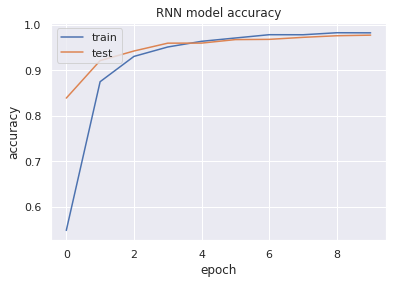

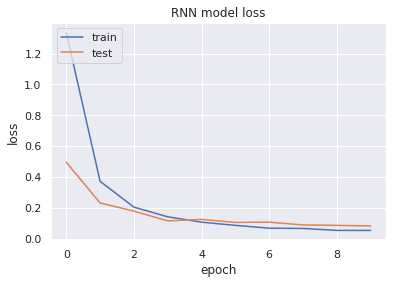

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

####**Evaluation of Final Model (RNN)**

**train accuracy : 98.97%**\
**test accuracy  : 97.64%**\
**f1 score       : 0.98**

####**Saving the model**

In [ ]:
import joblib

model.save("/content/drive/MyDrive/Colab Notebooks/capstone project/final/rnn_final.h5")
joblib.dump(tokenizer, '/content/drive/MyDrive/Colab Notebooks/capstone project/final/tokenizer.pkl')
joblib.dump(encoder, '/content/drive/MyDrive/Colab Notebooks/capstone project/final/label_encoder.pkl')

['/content/drive/MyDrive/Colab Notebooks/capstone project/final/label_encoder.pkl']

##**Conclusion**

1. **Use case**\
	Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service. Hence an automatic AI based ticketting system will be very useful in large organisations


2. **Objective**\
    To deleop an AI based algorithm to streamline the process of ticketing to help large organisations to save time and human effort. also to develop a more dependable ticket assignment system which can out perform humans. Inshort better user experience, monetary benefits for the organisation and saving of manpower and time.

      
3. **Approach**\
    After a lot of research and iterations we simplified the process to 3 major steps - Data clean up (removing all non english charecters, extra spaces, etc.), translating non-english words to english and prediction using RNN.


4. **Business impact or benefits in implementing this in an organisation**
    This AI based algorithm streamlines the process of ticketing to help large organisations to save time and human effort. The key benefits in implementing this system in an organisation gives
    
    - Better user experience. 
    - Monetary benefits to the organisation by saving manpower.
    - Quick responce to the users resulting in better customer satifaction.
    - Less downtime.
    - More accurate and consistant Ticket Assignment 

---

##**User Interface (UI) Development**

For easy entry of problem and Description of an IT ticket by a user we developed a simple User Interface (UI) which will use our developed RNN model to assign the Tickets to the respective groups. For this we use the saved model and encoder files.

**UI Development:**\
We used Figma to create the layout of the UI as shown below\
https://www.figma.com


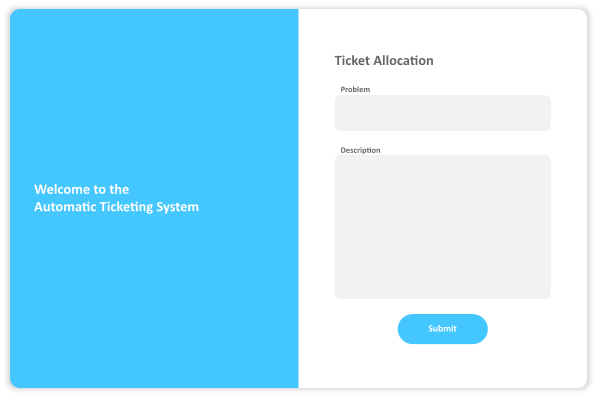

We used Tkinter-Designer package to convert the Figma file to a Tkinter based python code.\
https://github.com/ParthJadhav/Tkinter-Designer


####**Few Trials using the ATS App we developed:**

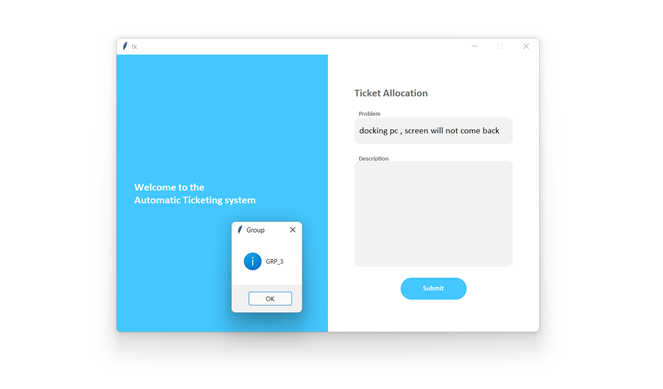

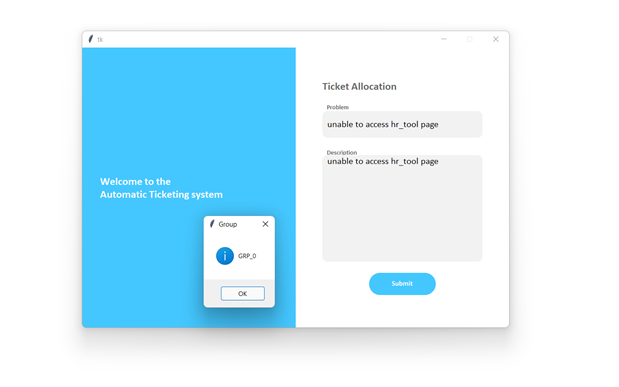

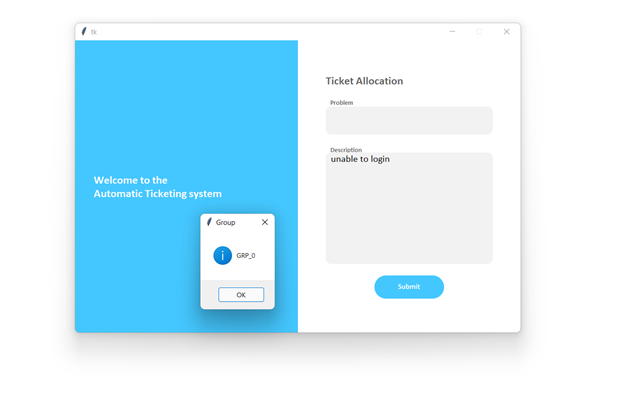

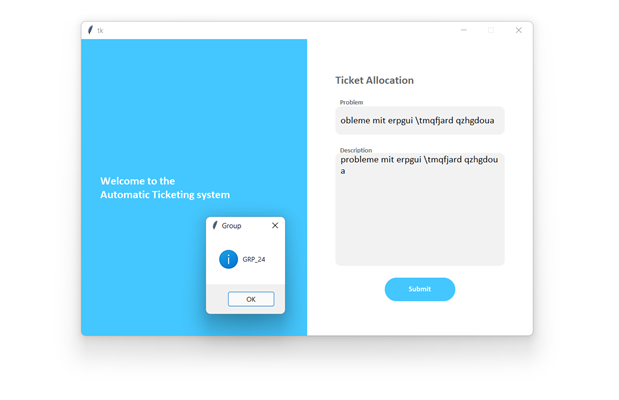

####**UI Code**

**File 1 : gui.py – this file contains the generated UI code ( we run this file to start the app )**

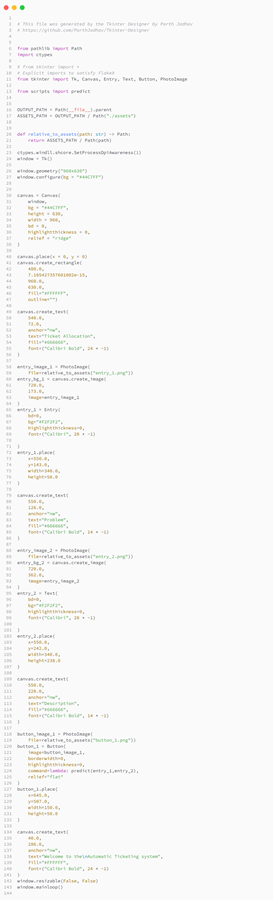

**File 2: scripts.py – contains the predict function**

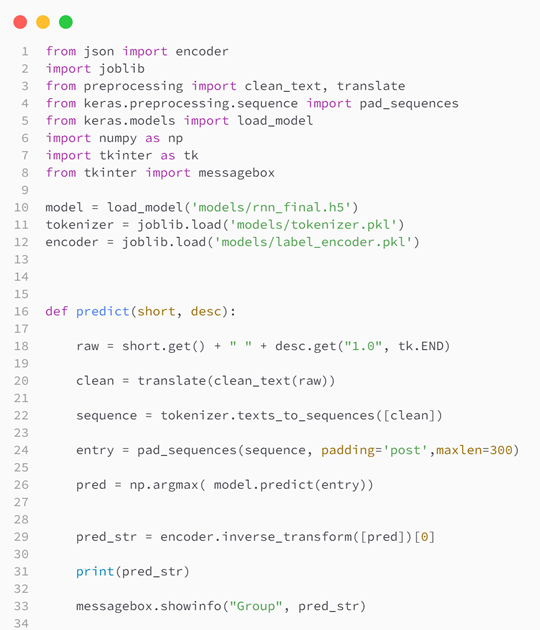

**File 3: preprocessing.py – contains the preprocessing functions**

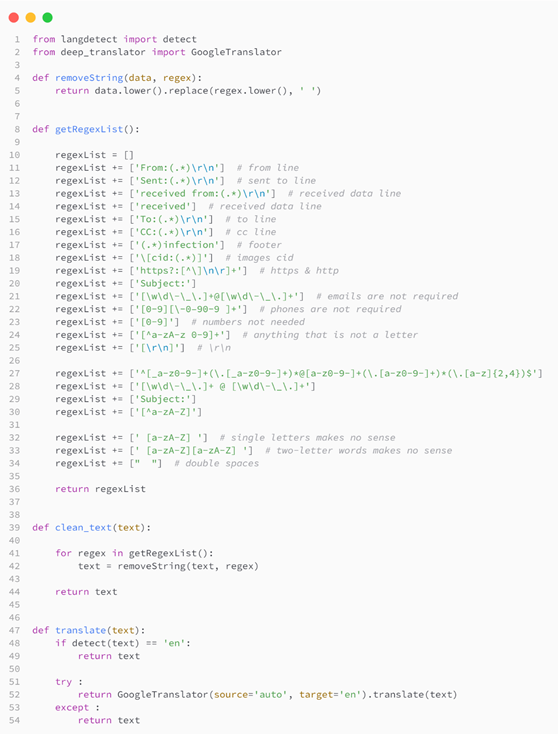

---